## Import Libraries

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


## Adjust Column Width

In [23]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 200)  
pd.set_option('display.colheader_justify', 'center') 

## Load Dataset

In [24]:
df = pd.read_csv("/Users/muneebsahibzada/Downloads/Automobile.csv")

## Select Relevant Numerical Features


In [25]:
numerical_features = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]

## Capitalize Car Names


In [26]:
df["name"] = df["name"].str.title()

## Normalize Data

In [27]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

## Define Query Cars and Their Indices


In [28]:
query_indices = {
    "1971 Ford Mustang": df[(df["name"].str.contains("Ford Mustang")) & (df["model_year"] == 71)].index[0],
    "1982 Toyota Corolla": df[(df["name"].str.contains("Toyota Corolla")) & (df["model_year"] == 82)].index[0],
    "1982 Honda Civic": df[(df["name"].str.contains("Honda Civic")) & (df["model_year"] == 82)].index[0]
}


## Compute Euclidean Distances


In [29]:
distances = cdist(df_scaled[numerical_features], df_scaled[numerical_features], metric="euclidean")

## Find Top 10 Similar Cars


In [30]:
top_similar_cars = {}
for car, idx in query_indices.items():
    similar_indices = distances[idx].argsort()[1:11] 
    top_similar_cars[car] = df.iloc[similar_indices][["name", "mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]


## Display Results

In [31]:
for car, similar_cars in top_similar_cars.items():
    print(f"Top 10 similar cars to {car}:")
    print(similar_cars)
    print("\n")

Top 10 similar cars to 1971 Ford Mustang:
                name              mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
47             Pontiac Firebird  19.0      6          250.0        100.0     3282       15.0          71    
36              Ford Torino 500  19.0      6          250.0         88.0     3302       15.5          71    
37                  Amc Matador  18.0      6          232.0        100.0     3288       15.5          71    
35    Chevrolet Chevelle Malibu  17.0      6          250.0        100.0     3329       15.5          71    
45   Amc Hornet Sportabout (Sw)  18.0      6          258.0        110.0     2962       13.5          71    
34    Plymouth Satellite Custom  16.0      6          225.0        105.0     3439       15.5          71    
107                 Amc Gremlin  18.0      6          232.0        100.0     2789       15.0          73    
16                   Amc Hornet  18.0      6          199.0         97.0     2774     

## Visualization (example for one car)


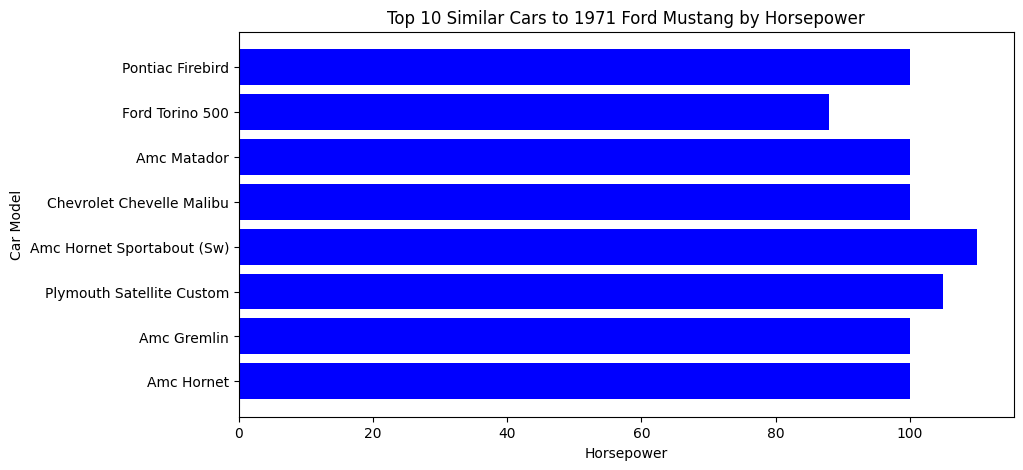

In [32]:
plt.figure(figsize=(10, 5))
plt.barh(top_similar_cars["1971 Ford Mustang"]["name"], top_similar_cars["1971 Ford Mustang"]["horsepower"], color="blue")
plt.xlabel("Horsepower")
plt.ylabel("Car Model")
plt.title("Top 10 Similar Cars to 1971 Ford Mustang by Horsepower")
plt.gca().invert_yaxis()
plt.show()